In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#### feature를 컬럼으로 DataFrame 생성

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [45]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2
X_train, X_test, y_train, y_test =train_test_split(cancer.data, cancer.target, test_size=0.2)
## RandomForestClassifier 모델 생성. 결정트리갯수는 100
cancer_model = RandomForestClassifier(n_estimators=100)

## 학습시킴
cancer_model.fit(X_train, y_train)


RandomForestClassifier()

In [46]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함

print('Training DataSet Accuracy:{:3f}'.format(cancer_model.score(X_train, y_train)))
print('Test DataSet Accuracy:{:3f}'.format(cancer_model.score(X_test, y_test)))


Training DataSet Accuracy:1.000000
Test DataSet Accuracy:0.982456


In [47]:
## 하이퍼 파라미터값을 지정
## max_features=2
## max_depth=5
## 오버핏팅이 다소 줄어들고 정확도가 조금 올라가는 것을 확인하자

cancer_model = RandomForestClassifier(n_estimators=100, max_features=2, max_depth=5)
cancer_model.fit(X_train, y_train)

print('Training DataSet Accuracy:{:3f}'.format(cancer_model.score(X_train, y_train)))
print('Test DataSet Accuracy:{:3f}'.format(cancer_model.score(X_test, y_test)))

Training DataSet Accuracy:0.991209
Test DataSet Accuracy:0.973684


In [48]:
print('특성 중요도:\n{}'.format(cancer_model.feature_importances_))

특성 중요도:
[0.04437519 0.02166445 0.04691158 0.05680121 0.0103861  0.02176226
 0.05173356 0.08937318 0.00466716 0.00525351 0.01400634 0.00652361
 0.0242591  0.05851371 0.00601317 0.01154016 0.01830473 0.01425217
 0.00554229 0.00565978 0.08243711 0.0172417  0.09576901 0.11010852
 0.01491706 0.01469819 0.05114042 0.07578883 0.01335414 0.00700172]


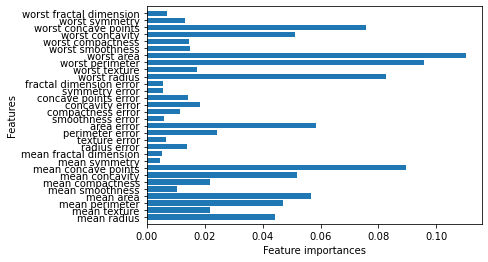

In [49]:
## 특성 중요도를 시각화하자.
def plot_feature_importances_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('Feature importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_feature)
    
plot_feature_importances_cancer(cancer_model)

In [54]:
im = cancer_model.feature_importances_
im_df = pd.DataFrame(im, index=cancer.feature_names, columns=["importance"])
im_df.sort_values(by="importance", ascending=False, inplace=True)
im_top10 = im_df.head(10)
im_top10

,importance
worst area,0.110109
worst perimeter,0.095769
mean concave points,0.089373
worst radius,0.082437
worst concave points,0.075789
area error,0.058514
mean area,0.056801
mean concavity,0.051734
worst concavity,0.051140
mean perimeter,0.046912


In [63]:
import seaborn as sns

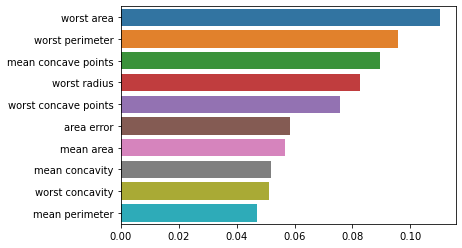

In [69]:
# 중요도 순으로 졍렬해서 시각화

sns.barplot(data=im_top10.transpose(), orient='h')


In [61]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
max_depths = [1,3,4,6,10,15]
for i in max_depths:
    cancer_model = RandomForestClassifier(n_estimators=100, max_depth=i)
    cancer_model.fit(X_train,y_train)
    print('max_depth:{}, 정확도:{:3f}'.format(i,cancer_model.score(X_train, y_train)))


max_depth:1, 정확도:0.927473
max_depth:3, 정확도:0.973626
max_depth:4, 정확도:0.989011
max_depth:6, 정확도:0.995604
max_depth:10, 정확도:1.000000
max_depth:15, 정확도:1.000000
